In [1]:
%pylab nbagg
%matplotlib notebook

import cma, como
# Set parameters
dimension = 10
num_kernels = 5

list_of_solvers = como.get_cmas(num_kernels * [dimension * [1]], 0.2)
moes = como.Sofomore(list_of_solvers, reference_point = [11,11])



Populating the interactive namespace from numpy and matplotlib


In [2]:
fitness = como.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#g = lambda x: x[0] > 0.3
while not moes.stop():
#for i in range(100):
    solutions = moes.ask()
    objective_values = [fitness(x) for x in solutions]
#    g_values = [g(x) for x in solutions]
#    moes.tell(solutions, objective_values, [g_values])
    moes.tell(solutions, objective_values)
    moes.disp()
    moes.logger.add()


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1     10 1.100000000000000e+01 1.0e+00 2.00e-01  2e-01  2e-01
    2     20 2.259162080271431e+01 1.0e+00 2.00e-01  2e-01  2e-01
    3     30 2.515929819136197e+01 1.0e+00 1.89e-01  2e-01  2e-01
  100   1000 9.582291325661261e+01 1.6e+00 1.51e-01  1e-01  2e-01
  200   2000 9.716776475020828e+01 1.8e+00 3.93e-02  2e-02  3e-02
  300   3000 9.723409846239480e+01 2.0e+00 1.08e-02  6e-03  9e-03
  400   4000 9.724078316583264e+01 2.1e+00 2.83e-03  1e-03  2e-03
  500   5000 9.724107995352408e+01 2.1e+00 8.19e-04  3e-04  4e-04
  600   6000 9.724109763433700e+01 2.1e+00 2.41e-04  8e-05  1e-04
  700   7000 9.724109824144885e+01 2.2e+00 6.84e-05  2e-05  3e-05
  800   7910 9.724109829906637e+01 2.2e+00 2.23e-05  5e-06  7e-06
  833   8100 9.724109830167293e+01 2.2e+00 1.60e-05  4e-06  5e-06


<IPython.core.display.Javascript object>


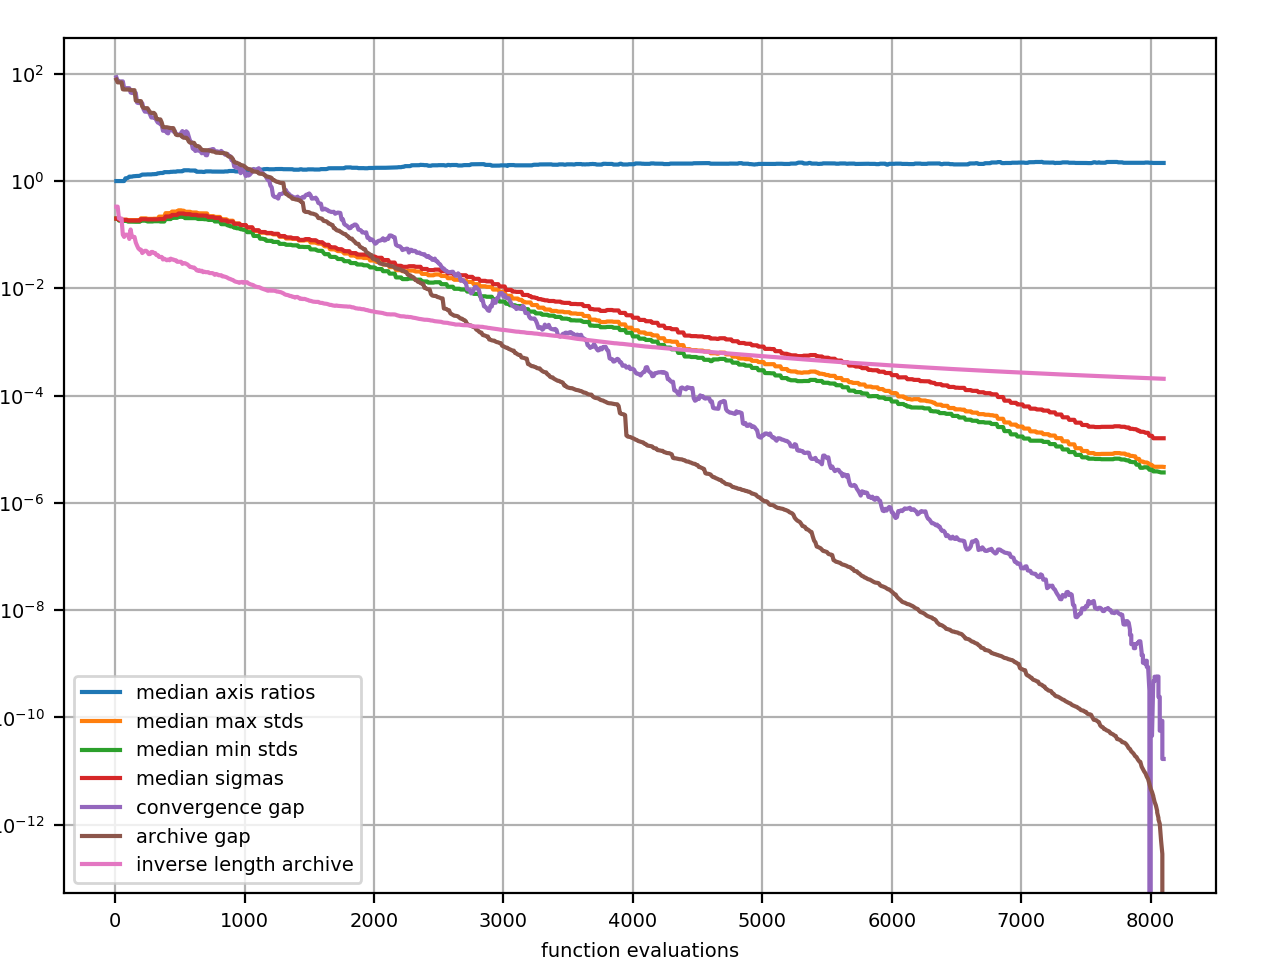

In [3]:
moes.logger.plot_divers()

In [ ]:
moes.logger.plot_ratios()

In [ ]:
%pdb

In [ ]:
iterat, countevals, res = moes.logger.load('outsofomore/ratio_nondom_offsp_incumb.dat')

In [ ]:
cma.plot('cma_kern')

In [ ]:
if moes.nda is None:
    moes.nda = BNDSL if len(objective_values[0]) == 2 else NDL
for i in range(len(moes._told_indices)):
    moes.kernels[moes._told_indices[i]].objective_values = objective_values[i]

if moes.reference_point is None:
    pass #write here the max among the kernel.objective_values       
moes.front = moes.nda([kernel.objective_values for kernel in moes.kernels],
                 moes.reference_point)



In [ ]:
ikernel, offspring = moes._offspring[0]

In [ ]:
start = len(moes._told_indices)

In [ ]:
print(start)

In [ ]:
kernel = moes.kernels[ikernel]
fit = kernel.objective_values
if fit in moes.front: # i.e. if fit is not dominated and dominates               # the reference point
    moes.front.remove(fit)

In [ ]:
hypervolume_improvements = [moes.front.hypervolume_improvement(
                    point) for point in objective_values[start:start+len(offspring)]]
moes.front.add(fit) # in case num_kernels > 1
            


In [ ]:
start

In [ ]:
constraints_values = [[g(x) for x in solutions]]

In [ ]:
g_values = [constraint[start:start+len(offspring)] \
            for constraint in constraints_values]
penalized_f_values = mo.RankPenalizedFitness([-float(u) for u in 
                    hypervolume_improvements], g_values)


In [ ]:
import cma

In [ ]:
cma.utilities.utils.ElapsedWCTime?

In [ ]:
es.timer.elapsed

In [ ]:
%pylab nbagg
%matplotlib notebook

In [ ]:
import cma

In [ ]:
es = cma.CMAEvolutionStrategy(15 * [1], 0.2)

In [ ]:
es.optimize(cma.ff.sphere)

In [ ]:
es.plot()

In [ ]:
es.logger.plot_divers()

In [ ]:
es.logger.plot_divers()

In [ ]:
fn_axis_ratios = 'median_axis_ratios.dat'
fn_max_stds = 'median_max_stds.dat'
fn_min_stds = 'median_min_stds.dat' 
fn_sigmas = 'median_sigmas.dat'
fn_hypervolume = 'hypervolume.dat'
fn_archive = 'hypervolume_archive.dat' 
fn_len_archive = 'len_archive.dat' 

filenames = fn_axis_ratios, fn_max_stds, fn_min_stds, fn_sigmas,
fn_hypervolume, fn_archive, fn_len_archive

In [ ]:
filenames